# DICOM files

## Lectura de un archivo DICOM

**Pre-requisitos para los archivos en formato DICOM**
* La distribución de dosis en el archivo DICOM debe contener solo dos dimensiones. 
* La resolución espacial debe de ser igual en ambas dimensiones.
* Dosepy no hace uso de las coordenadas dadas en el archivo DICOM.
* La unidad para la dosis deberá ser el Gray (Gy). 

Si la distribución de dosis se generará en un sistema de planeación para tratamientos (TPS), exportar solamente un plano de dosis. 

En esta guía se utilizará el archivo *'RD_20x20cm2_256x256pix.dcm'* dentro de la carpeta *Jupyter*. El archivo DICOM se generó desde el sistema de planeación Eclipse (versión 15.1), exportando una región de interés de 20 cm x 20 cm, centrada en el isocentro y con 256 x 256 puntos. 

```{note}
Para este ejemplo se utilizará la terminal de comandos.
```

Importamos los paquetes Dosepy y numpy

In [3]:
from Dosepy.image import load
import numpy as np

Para la lectura de un archivo DICOM, llamamos a la función *load*.

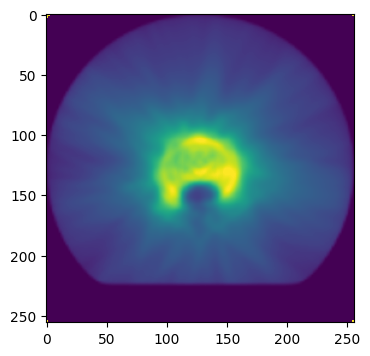

In [5]:
d_tps = load('/home/luis/RD_20x20cm2_256x256pix.dcm')

#---------------------------------------------
#   Código para visualizar las distribuciones de dosis
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.imshow(d_tps.array, cmap='viridis', vmin=0, vmax = 1.15 * np.percentile(d_tps.array, 98))
plt.show()
#---------------------------------------------

Cargamos en memoria la distribución de dosis medida con película radiocrómica, con resolución de 0.78125 mm/punto.

In [11]:
np_array = np.genfromtxt('/home/luis/RD_20x20.csv', delimiter = ",", comments = "#")
d_film = load(np_array, dpi=25.4/0.78125)

Graficamos las distribuciones

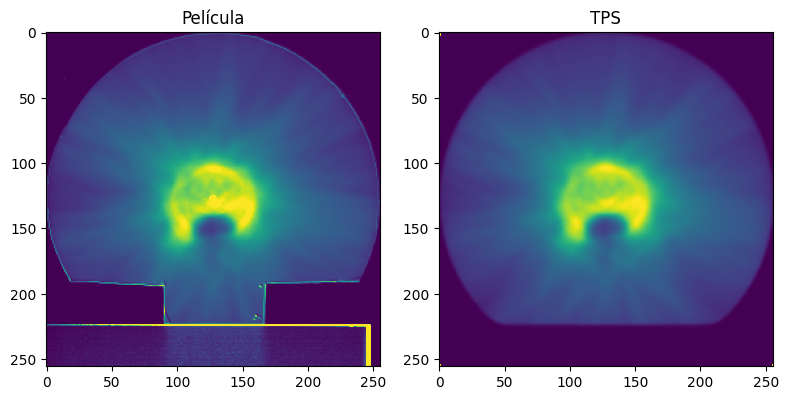

In [10]:
#---------------------------------------------
#   Visualizar las distribuciones de dosis

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(d_film.array, cmap='viridis', vmin=0, vmax = 1.15 * np.percentile(d_tps.array, 98))
ax[0].set_title('Película')
ax[1].imshow(d_tps.array, cmap='viridis', vmin=0, vmax = 1.15 * np.percentile(d_tps.array, 98))
ax[1].set_title('TPS')
fig.tight_layout()
plt.show()
#---------------------------------------------

In [12]:
gamma_distribution, pass_rate = d_tps.gamma2D(d_film, 3, 2)

print(f"El porcentaje de aporbación es: {pass_rate:.1f} %")

Dosis máxima: 8.0
Umbral de dosis: 0.8
El porcentaje de aporbación es: 90.3 %


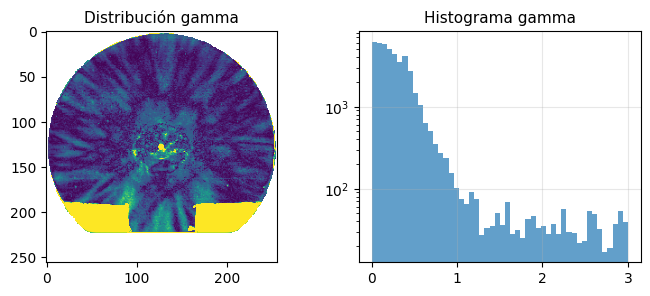

In [14]:
#---------------------------------------------
# Graficamos el resultado

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
ax = axes.ravel()

ax[0].set_title('Distribución gamma', fontsize = 11)
ax[0].imshow(gamma_distribution, vmax = 1.4)

ax[1].set_title('Histograma gamma', fontsize = 11)
ax[1].grid(alpha = 0.3)
ax[1].hist( gamma_distribution[~np.isnan(gamma_distribution)] , bins = 50, range = (0,3), alpha = 0.7, log= True)

plt.show()